In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
data = datasets.load_diabetes()

In [ ]:
X = data.data[:, [-2, -1]]
Y = data.target

print(f'X: {X} Y:{Y}')


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2222)

In [ ]:

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(f'XTRAIN: {X_train_std} XTEST:{X_test_std}')


In [ ]:

reg = LinearRegression()
reg.fit(X_train_std, Y_train)

y_pred = reg.predict(X_test_std)

print("MSE:", mean_squared_error(Y_test, y_pred))
print("R2 Score:", r2_score(Y_test, y_pred))

In [ ]:
# Convert regression outputs to nearest integer for classification metrics
y_pred_class = np.round(y_pred)
Y_test_class = np.round(Y_test)

print(f'matriz de confucion: \n\n{confusion_matrix(Y_test_class, y_pred_class)}')
print(f"Accuracy: \n{accuracy_score(Y_test_class, y_pred_class)}")
print(f"Classification report:\n{classification_report(Y_test_class, y_pred_class)}")

In [ ]:
flores = datasets.load_iris()
x = flores.data[:, [2,3]]
y = flores.target

print(flores.target)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)

In [ ]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
model = GaussianNB()
model.fit(x_train_std, y_train)

In [ ]:
print(confusion_matrix(y_test, model.predict(x_test_std)))

In [8]:
vino = datasets.load_wine()
x = vino.data[:, [2,3]]
y = vino.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)

In [10]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
model = GaussianNB()
model.fit(x_train_std, y_train)

,priors,None
,var_smoothing,1e-09


In [12]:

print(confusion_matrix(y_test, model.predict(x_test_std)))

[[20  0  2]
 [ 2 13  4]
 [ 0  2 11]]


c:\Users\VICTUS\Documents\Programing_stuff_4.0\SENASoft-AI\david\ML_scikit_learn\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


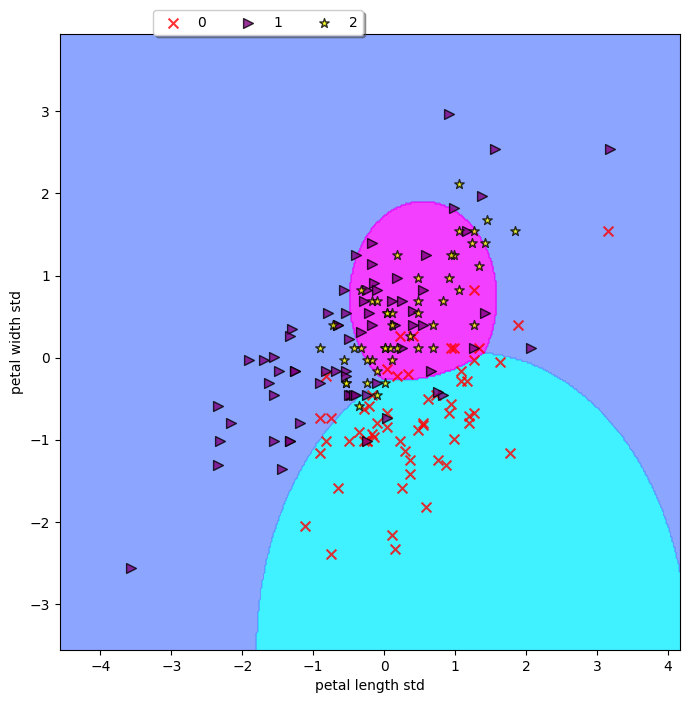

In [13]:
import Plotting_Decision_Boundaries as db


X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

db.plotting_db(X=X_combined_std, y=y_combined, classifier=model)